In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
req_df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
req_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal Width')

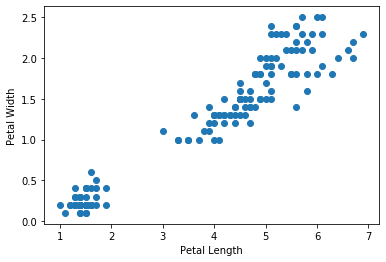

In [14]:
plt.scatter(req_df['petal length (cm)'], req_df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [15]:
km = KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(req_df)

In [19]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
km.inertia_

31.371358974358973

In [21]:
req_df['cluster'] = y_predicted
req_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [26]:
df0 = req_df[req_df.cluster == 0]
df1 = req_df[req_df.cluster == 1]
df2 = req_df[req_df.cluster == 2]

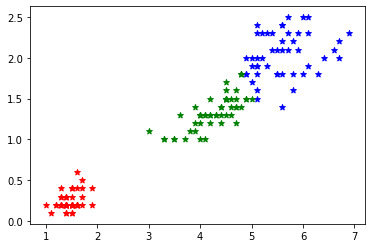

In [28]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color= 'red', marker= '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= 'blue', marker= '*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color= 'green', marker= '*')

In [32]:
sse = []
k_range = range(1,10)

In [33]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(req_df)
    sse.append(km.inertia_)

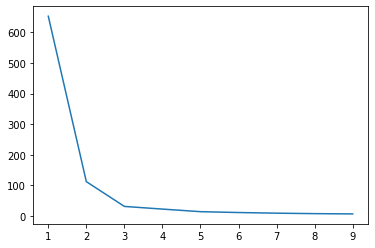

In [36]:
plt.plot(k_range, sse)